In [3]:
%pip install seaborn

Shape of dataset: (386, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        386 non-null    object
 1   age          386 non-null    object
 2   menopause    386 non-null    object
 3   tumor-size   385 non-null    object
 4   inv-nodes    385 non-null    object
 5   node-caps    386 non-null    object
 6   deg-malig    386 non-null    int64 
 7   breast       386 non-null    object
 8   breast-quad  386 non-null    object
 9   irradiat     386 non-null    object
dtypes: int64(1), object(9)
memory usage: 16.7+ KB
None
Number of duplicate rows: 11
Missing values per column:
 class           0
age             0
menopause       0
tumor-size      1
inv-nodes       1
node-caps      12
deg-malig       0
breast          0
breast-quad     6
irradiat        0
dtype: int64


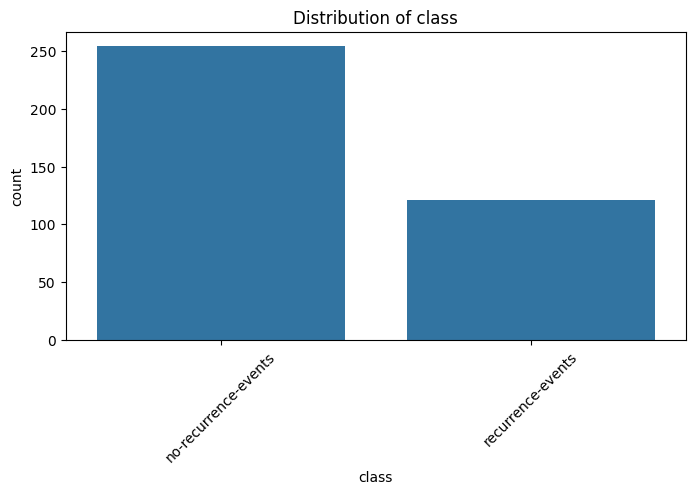

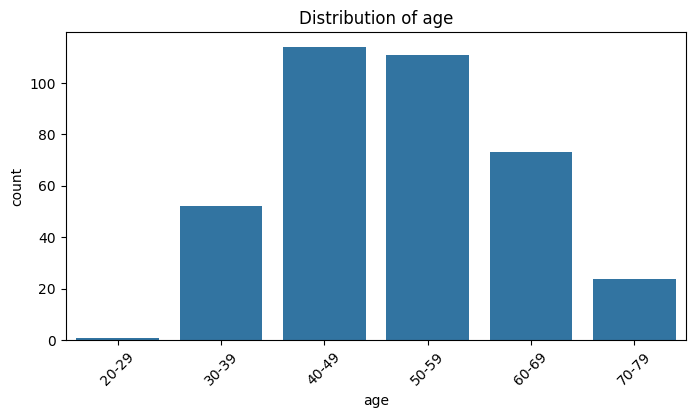

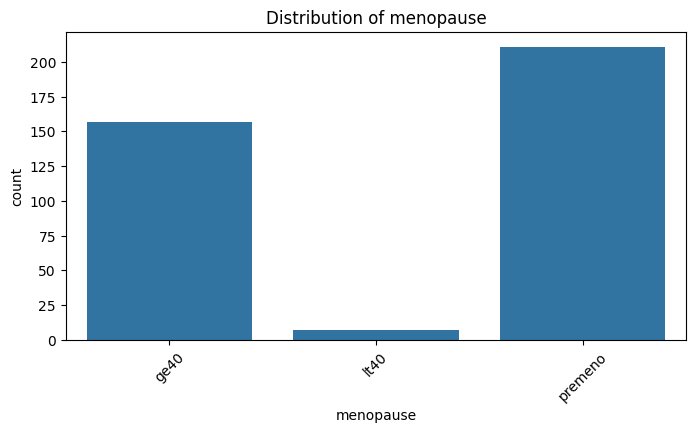

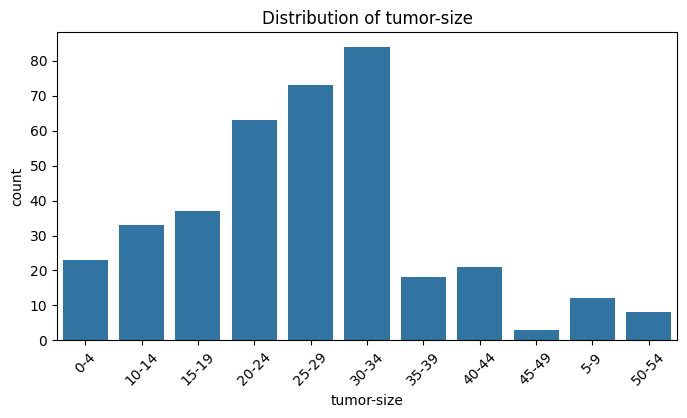

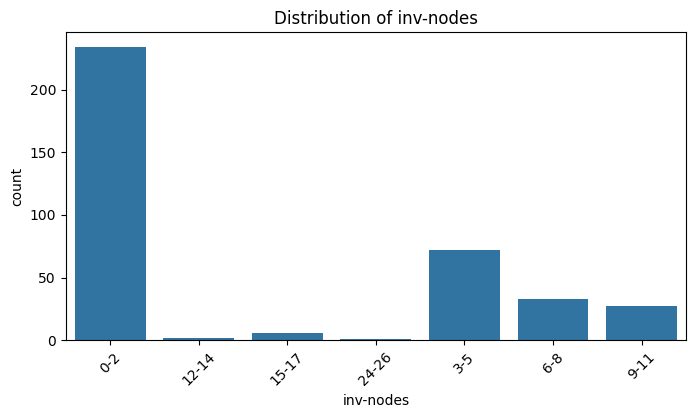

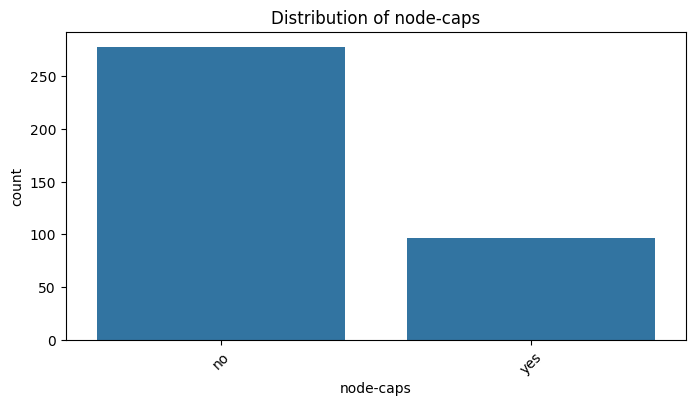

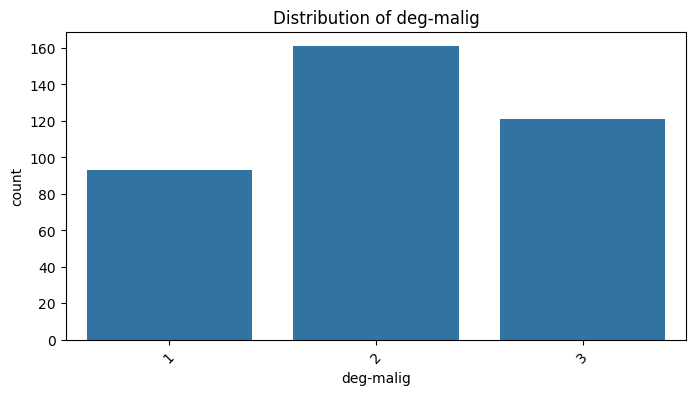

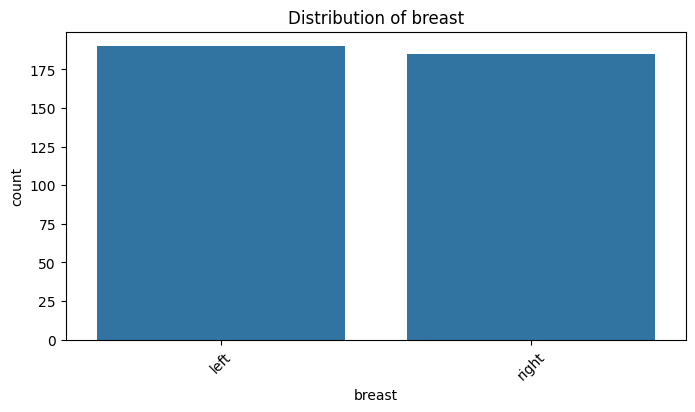

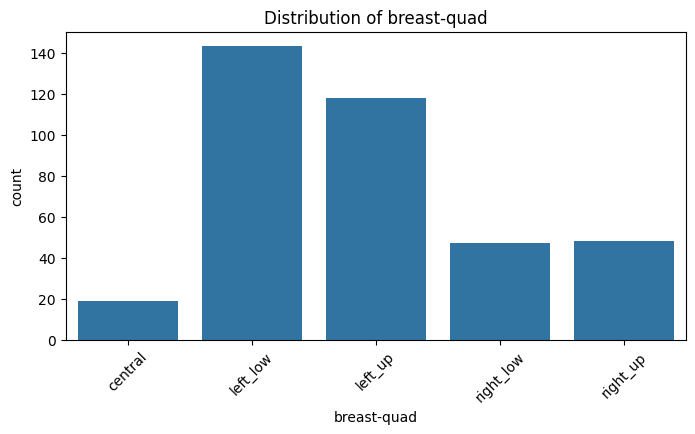

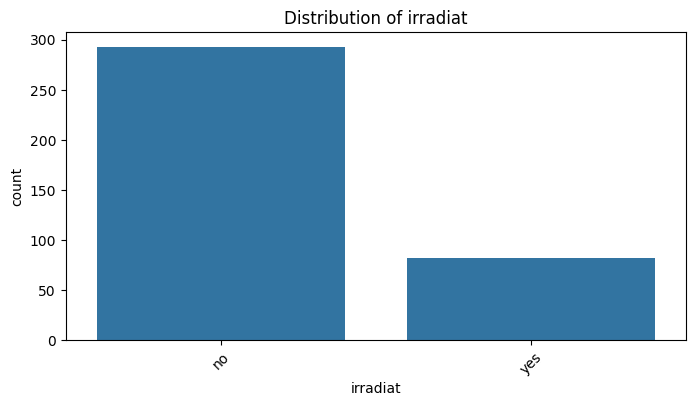

Shape after encoding: (375, 31)


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("breast_cancer_data.csv")
print("Shape of dataset:", df.shape)

print(df.info())
print("Number of duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

df.replace(['?', '*'], np.nan, inplace=True)
print("Missing values per column:\n", df.isnull().sum())

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])

for col in df.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=sorted(df[col].unique()))
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

X = df.drop('class', axis=1)
y = df['class']
X_encoded = pd.get_dummies(X, drop_first=True)
print("Shape after encoding:", X_encoded.shape)


In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Used GPT to figure out how to maintain class proportions (stratify)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, 
                                                    test_size=0.2, 
                                                    stratify=y, 
                                                    random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

param_grid = {'n_neighbors': list(range(1, 11))}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_knn.fit(X_train, y_train)
y_pred_grid = grid_knn.predict(X_test)
print("KNN with GridSearchCV Classification Report:")
print(classification_report(y_test, y_pred_grid))
print("Best Parameters from GridSearchCV:", grid_knn.best_params_)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))


KNN Classification Report:
                      precision    recall  f1-score   support

no-recurrence-events       0.66      0.84      0.74        51
   recurrence-events       0.20      0.08      0.12        24

            accuracy                           0.60        75
           macro avg       0.43      0.46      0.43        75
        weighted avg       0.51      0.60      0.54        75

KNN with GridSearchCV Classification Report:
                      precision    recall  f1-score   support

no-recurrence-events       0.69      0.94      0.79        51
   recurrence-events       0.40      0.08      0.14        24

            accuracy                           0.67        75
           macro avg       0.54      0.51      0.47        75
        weighted avg       0.59      0.67      0.58        75

Best Parameters from GridSearchCV: {'n_neighbors': 10}
Logistic Regression Classification Report:
                      precision    recall  f1-score   support

no-recurrence-eve